Sample data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



✅ Mean Absolute Error (MAE): 50413.43
✅ Root Mean Squared Error (RMSE): 69297.72


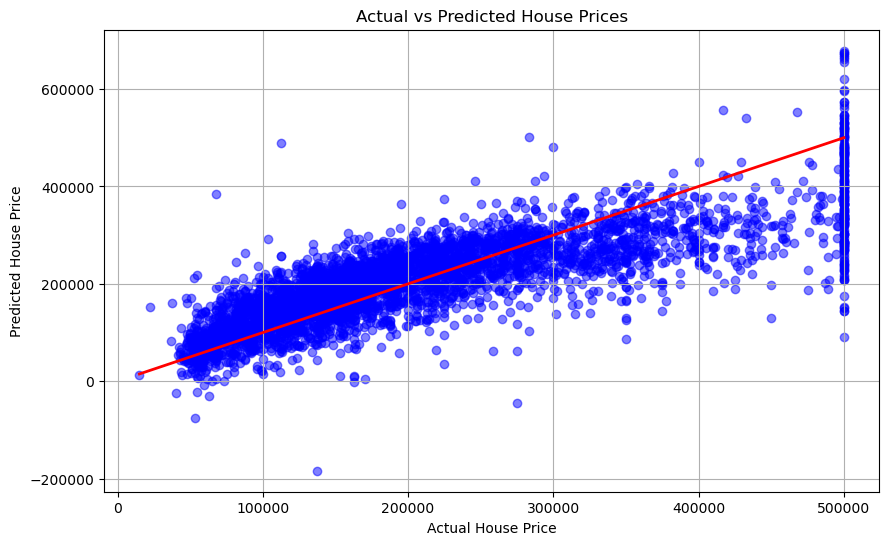

In [2]:
# ✅ Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Step 2: Load housing data from online CSV
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# ✅ Step 3: Show the first few rows
print("Sample data:")
display(df.head())

# ✅ Step 4: Drop rows with missing values
df = df.dropna()

# ✅ Step 5: Convert 'ocean_proximity' categorical column into numeric columns (one-hot encoding)
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# ✅ Step 6: Define features (X) and target (y)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# ✅ Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 8: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Step 9: Predict on test set
predictions = model.predict(X_test)

# ✅ Step 10: Evaluate model (compatible with old scikit-learn)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\n✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")

# ✅ Step 11: Plot predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
